In [1]:
import pandas as pd
from tech_core.feature_pipeline import FeaturesPipeline
from tech_core.losses import StreamingSharpeLoss
from tech_core.nn_builder import SimplePortfolioAllocator, DeepPortfolioAllocator_1
import torch
from tqdm import tqdm
# ??? Should we make different train periods for different models?

In [2]:
path_to_data = '../data/'

split_dates = [
    pd.Timestamp("2025-01-01")
]
split_names = ['train', 'test']

fee = 1.53e-4
padding = 35
batch_size_config = {
    0: 1000,
    # 40: 4000,
    # 80: 10000
}
num_epochs = 200
adam_lr = 1e-2
log_freq = 5

In [3]:
prev_models = []

batch_size = batch_size_config[0]
pipeline = FeaturesPipeline(
    path_to_data,
    padding=padding,
    batch_size=batch_size,
    split_dates=split_dates,
    split_names=split_names
)

cmf_dim = asset_dim = num_assets = None
for common_feats, asset_feats, fut_ret, _, _ in tqdm(pipeline.iterate('train'), desc="Loading features"):
    cmf_dim = common_feats.shape[1]
    asset_dim = asset_feats.shape[2]
    num_assets = asset_feats.shape[1]
    break
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Loading features: 0it [00:00, ?it/s]


  0%|          | 0/200 [00:00<?, ?it/s]

Changing batch size to 1000 at epoch 0


  2%|▏         | 4/200 [04:01<3:11:00, 58.47s/it]

Sharpe Ratio for the epoch: -1.6356
Average Weights:



,Weight
Cash,0.481406
IP,0.010701
JPM,0.009850
IBM,0.007618
WFC,0.005670
...,...
GPC,0.000117
HII,0.000114
VRSN,0.000105
NDSN,0.000104


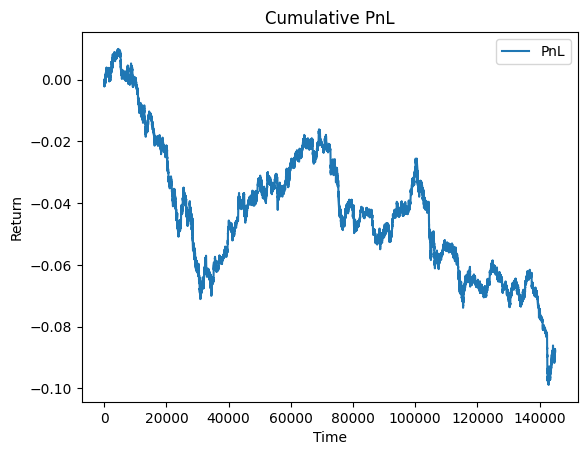

Epoch 5: Loss = -2.5935921669006348
Sharpe Ratio for the epoch: -3.1935
Average Weights:



,Weight
Cash,0.450747
IP,0.014677
JPM,0.009720
IBM,0.009473
IRM,0.005619
...,...
GPC,0.000095
HII,0.000093
NDSN,0.000089
VRSN,0.000089


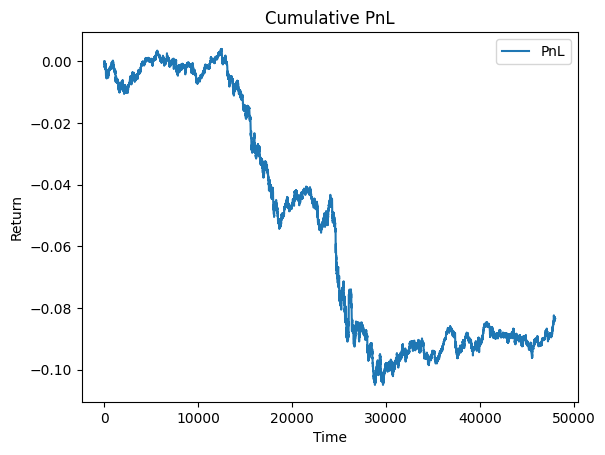

  4%|▍         | 9/200 [08:43<3:00:40, 56.76s/it]

Sharpe Ratio for the epoch: -0.1326
Average Weights:



,Weight
Cash,0.645727
IBM,0.022983
IP,0.020209
JPM,0.013976
IRM,0.010660
...,...
LKQ,0.000021
AME,0.000020
GPC,0.000019
VRSN,0.000018


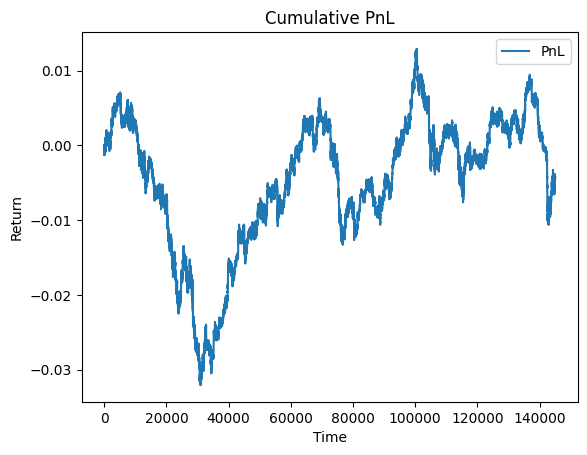

Epoch 10: Loss = -2.521836996078491
Sharpe Ratio for the epoch: -2.1452
Average Weights:



,Weight
Cash,0.607838
IBM,0.024767
IP,0.022632
JPM,0.011960
IRM,0.010899
...,...
LKQ,0.000017
AME,0.000017
GPC,0.000016
VRSN,0.000016


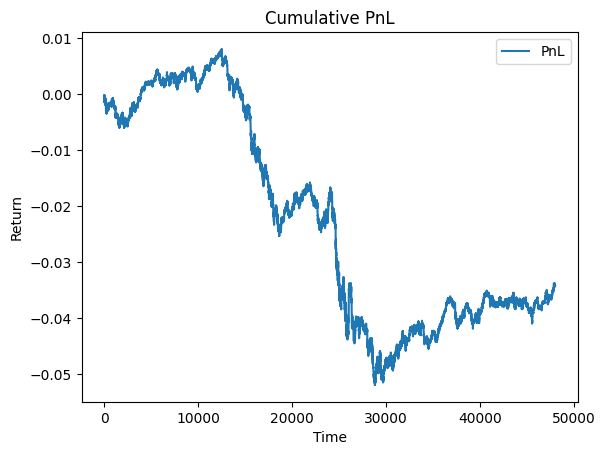

  7%|▋         | 14/200 [13:21<2:50:39, 55.05s/it]

Sharpe Ratio for the epoch: 0.7543
Average Weights:



,Weight
Cash,0.744742
IBM,0.022183
IP,0.015365
IRM,0.012234
JPM,0.009387
...,...
LKQ,0.000005
AME,0.000004
GPC,0.000004
VRSN,0.000004


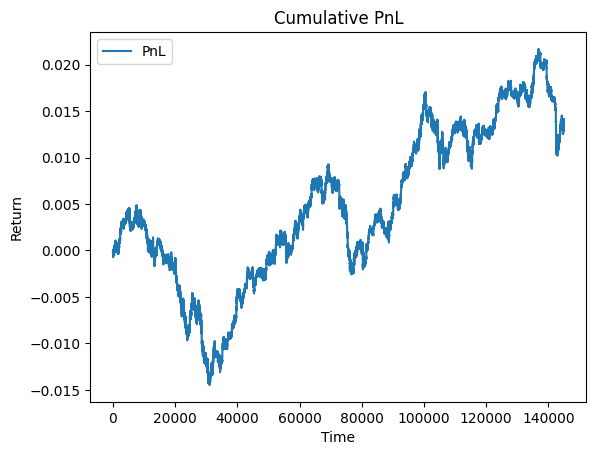

Epoch 15: Loss = -1.9309641122817993
Sharpe Ratio for the epoch: -1.5769
Average Weights:



,Weight
Cash,0.697509
IBM,0.021123
IP,0.016348
IRM,0.011719
JPM,0.007912
...,...
LKQ,0.000004
AME,0.000004
VRSN,0.000004
GPC,0.000004


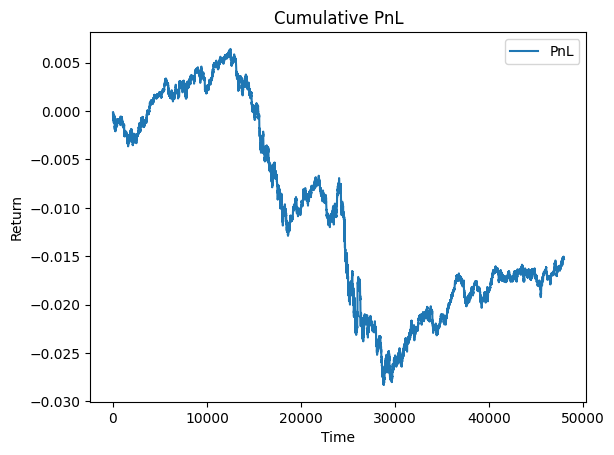

 10%|▉         | 19/200 [18:01<2:51:03, 56.70s/it]

Sharpe Ratio for the epoch: 3.1510
Average Weights:



,Weight
Cash,0.817810
IBM,0.008645
MPWR,0.008296
IP,0.007015
IRM,0.006260
...,...
LKQ,0.000001
GPC,0.000001
VRSN,0.000001
AME,0.000001


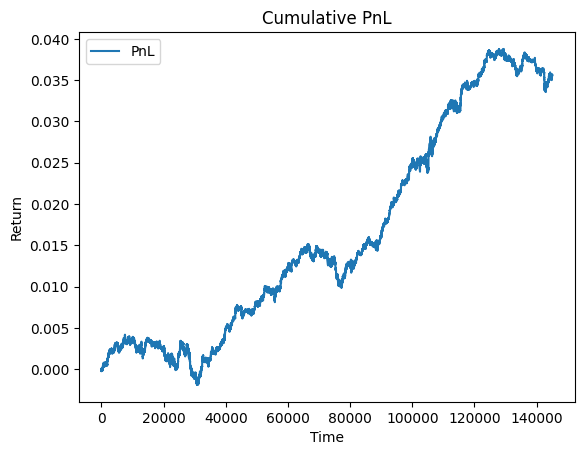

Epoch 20: Loss = 0.4985543489456177
Sharpe Ratio for the epoch: 1.4531
Average Weights:



,Weight
Cash,7.690722e-01
MPWR,7.741412e-03
IBM,7.412407e-03
IP,6.910378e-03
IRM,5.598844e-03
...,...
GPC,9.359553e-07
VRSN,9.353607e-07
LKQ,9.287602e-07
COO,9.051102e-07


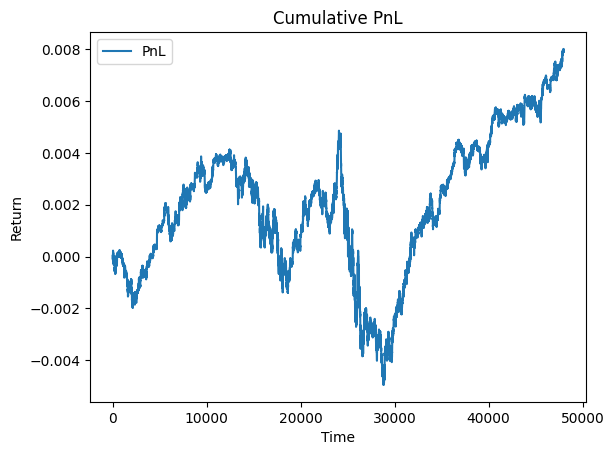

 12%|█▏        | 24/200 [22:43<2:48:02, 57.29s/it]

Sharpe Ratio for the epoch: 4.7446
Average Weights:



,Weight
Cash,8.457054e-01
MPWR,5.779324e-03
IBM,4.059877e-03
IP,3.975713e-03
IRM,3.706690e-03
...,...
GPC,3.887049e-07
VRSN,3.787561e-07
LKQ,3.767243e-07
COO,3.744604e-07


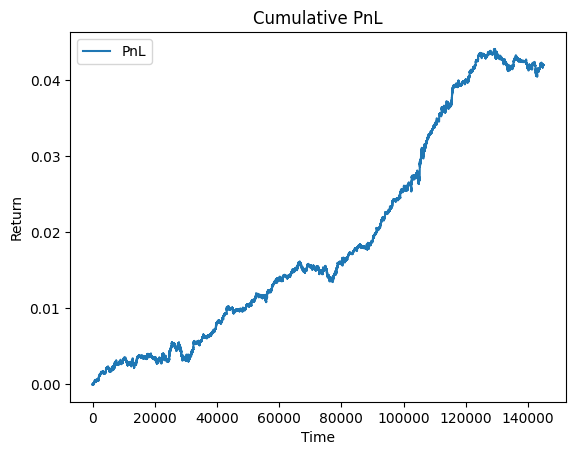

Epoch 25: Loss = 3.079305410385132
Sharpe Ratio for the epoch: 3.2445
Average Weights:



,Weight
Cash,7.905760e-01
MPWR,6.322988e-03
IP,4.154476e-03
IBM,3.786848e-03
IRM,3.580301e-03
...,...
GPC,3.751533e-07
COO,3.714864e-07
VRSN,3.681864e-07
LKQ,3.610864e-07


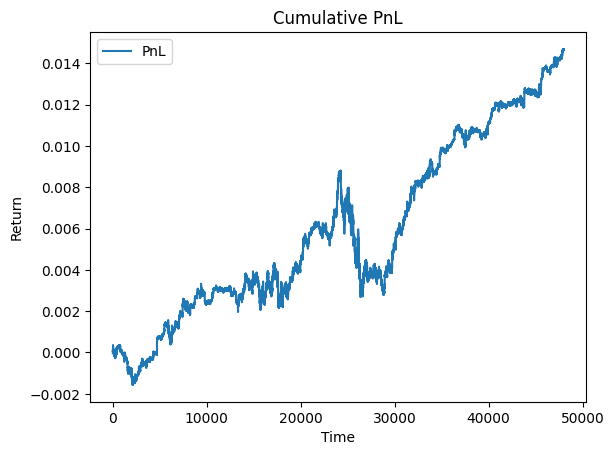

 14%|█▍        | 29/200 [27:08<2:32:29, 53.50s/it]

Sharpe Ratio for the epoch: 5.3211
Average Weights:



,Weight
Cash,8.488824e-01
MPWR,5.185601e-03
IP,3.531227e-03
IRM,3.412463e-03
IBM,3.201519e-03
...,...
GPC,2.357733e-07
COO,2.321991e-07
VRSN,2.254390e-07
LKQ,2.238313e-07


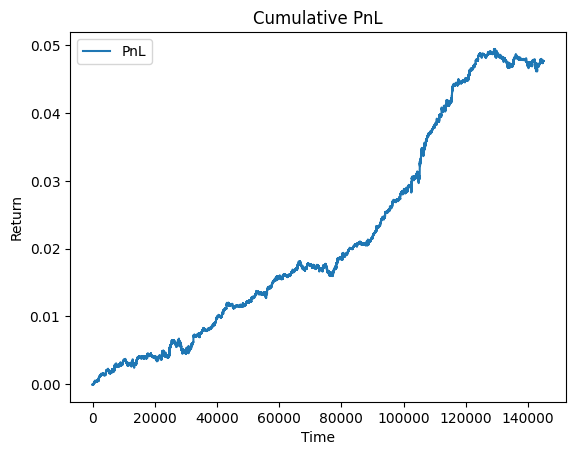

Epoch 30: Loss = 4.201932907104492
Sharpe Ratio for the epoch: 3.8523
Average Weights:



,Weight
Cash,7.928693e-01
MPWR,6.115759e-03
IP,3.752628e-03
IRM,3.328368e-03
IBM,3.034606e-03
...,...
COO,2.361344e-07
GPC,2.327496e-07
VRSN,2.243893e-07
LKQ,2.195922e-07


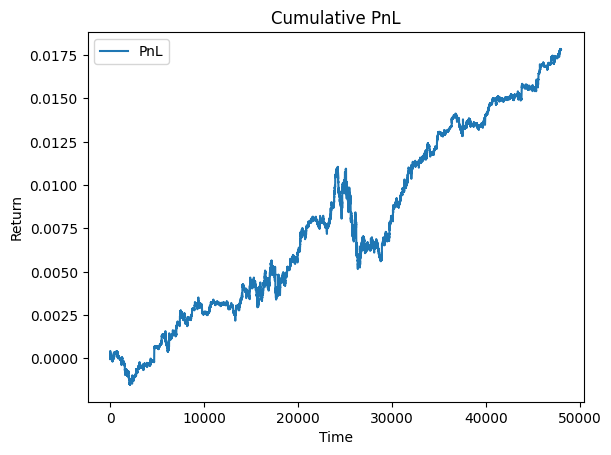

 17%|█▋        | 34/200 [31:24<2:21:00, 50.97s/it]

Sharpe Ratio for the epoch: 5.7283
Average Weights:



,Weight
Cash,8.495440e-01
MPWR,4.975405e-03
FICO,3.503106e-03
IP,3.406653e-03
IRM,3.304611e-03
...,...
COO,1.570375e-07
GPC,1.557911e-07
VRSN,1.465682e-07
LKQ,1.457460e-07


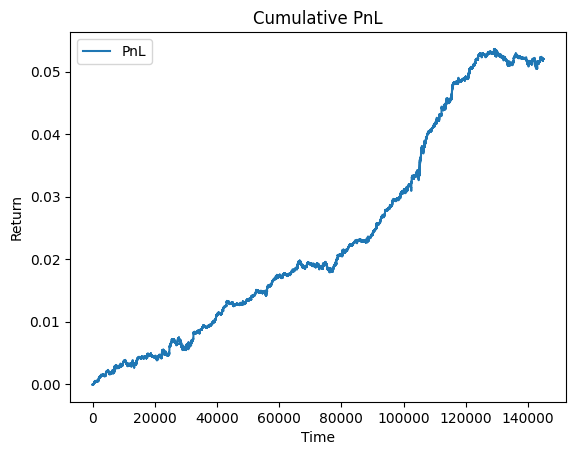

Epoch 35: Loss = 4.654922962188721
Sharpe Ratio for the epoch: 4.3063
Average Weights:



,Weight
Cash,7.932246e-01
MPWR,6.031167e-03
IP,3.648489e-03
FICO,3.368628e-03
IRM,3.223729e-03
...,...
TEL,1.587417e-07
GPC,1.553336e-07
VRSN,1.475652e-07
LKQ,1.444638e-07


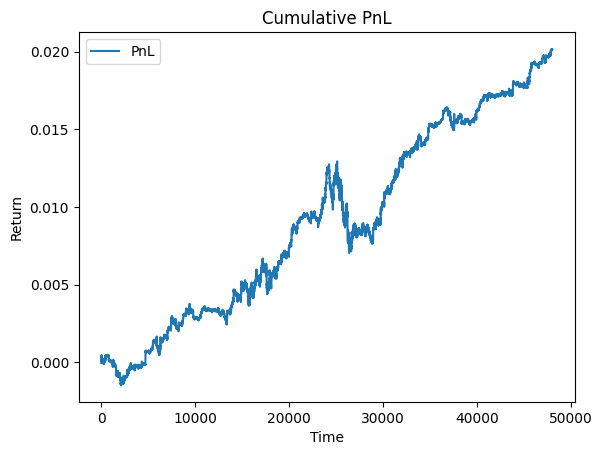

 20%|█▉        | 39/200 [35:53<2:23:07, 53.34s/it]

Sharpe Ratio for the epoch: 6.1006
Average Weights:



,Weight
Cash,8.498411e-01
MPWR,4.858884e-03
FICO,3.885594e-03
IP,3.321276e-03
IRM,3.177082e-03
...,...
TEL,1.055099e-07
GPC,1.041413e-07
VRSN,9.683685e-08
LKQ,9.639839e-08


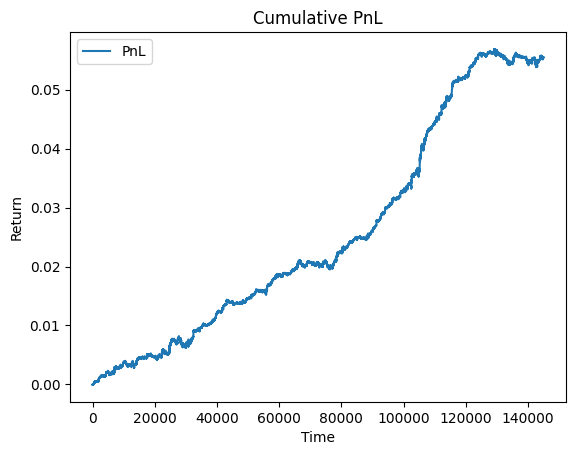

Epoch 40: Loss = 4.7866902351379395
Sharpe Ratio for the epoch: 4.7332
Average Weights:



,Weight
Cash,7.933478e-01
MPWR,5.940043e-03
FICO,3.813747e-03
IP,3.568730e-03
IRM,3.091071e-03
...,...
GPC,1.046027e-07
TEL,1.036479e-07
VRSN,9.838081e-08
LKQ,9.626790e-08


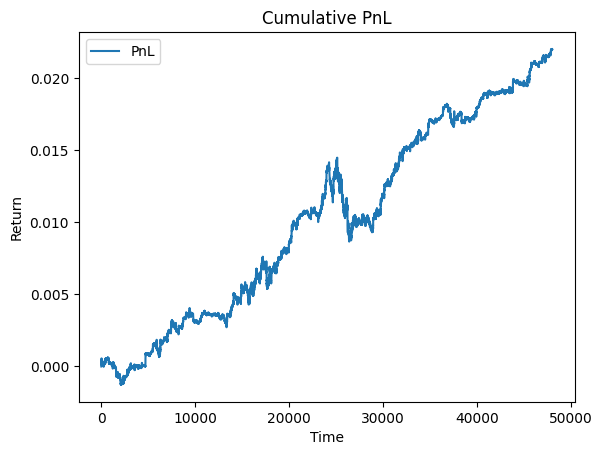

 22%|██▏       | 44/200 [40:25<2:21:55, 54.58s/it]

Sharpe Ratio for the epoch: 6.4593
Average Weights:



,Weight
Cash,8.501586e-01
MPWR,4.805333e-03
FICO,4.004464e-03
IP,3.245777e-03
IRM,3.015491e-03
...,...
GPC,6.934501e-08
TEL,6.861701e-08
VRSN,6.402594e-08
LKQ,6.372643e-08


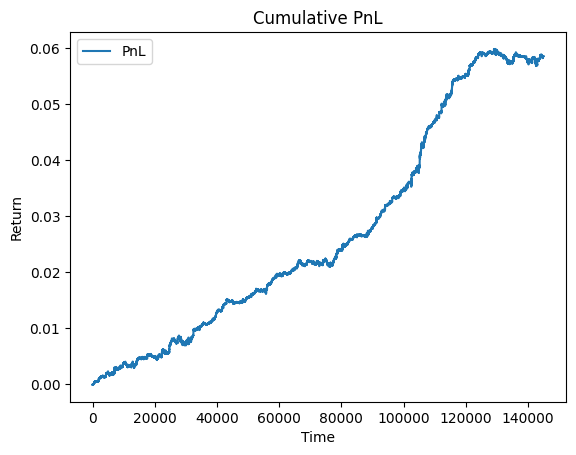

Epoch 45: Loss = 4.804719924926758
Sharpe Ratio for the epoch: 5.1352
Average Weights:



,Weight
Cash,7.934716e-01
MPWR,5.875034e-03
FICO,4.050187e-03
IP,3.497932e-03
BKNG,2.937714e-03
...,...
GPC,7.024285e-08
TEL,6.796660e-08
VRSN,6.570294e-08
LKQ,6.417843e-08


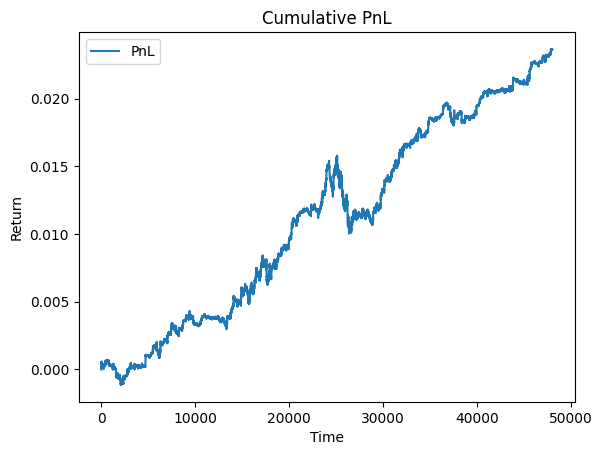

 24%|██▍       | 48/200 [43:50<2:10:51, 51.65s/it]

In [ ]:
from copy import deepcopy

model0 = SimplePortfolioAllocator(
    cmf_dim=cmf_dim,
    num_assets=num_assets,
).to(device)
model0.load_state_dict(torch.load('model_iteration_0_epoch_200.pth'))
model0.eval()

model1 = SimplePortfolioAllocator(
    cmf_dim=cmf_dim,
    num_assets=num_assets,
).to(device)
model1.load_state_dict(torch.load('model_iteration_1_epoch_200.pth'))
model1.eval()

prev_models = [model0, model1]

for i in range(len(prev_models), 10):

    # ad-hoc so far, mb add this to pipeline
    train_cash_left = []
    for common_feats, asset_feats, fut_ret, min_prices, market_caps in pipeline.iterate('train'):

        # Перевод в тензоры
        common_feats = torch.tensor(common_feats.values, dtype=torch.float32).to(device)       # (T, d_common)
        asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)       # (T, n_assets, d_asset)
        fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)       # (T, n_assets)
        min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)       # (T, n_assets)
        market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)       # (T, n_assets)

        if len(common_feats) != batch_size:
            continue

        cash_left = torch.ones((common_feats.shape[0], 1), dtype=torch.float32, device=device)  # (T, 1)
        for prev_model in prev_models:
            cash_left *= prev_model(common_feats, asset_feats)[:, -1:]
        train_cash_left.append(cash_left.detach())
    
    test_cash_left = []
    for common_feats, asset_feats, fut_ret, min_prices, market_caps in pipeline.iterate('test'):
        
        common_feats = torch.tensor(common_feats.values, dtype=torch.float32).to(device)
        asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)
        fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)
        min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)
        market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)
        
        if len(common_feats) != batch_size:
            continue
        cash_left = torch.ones((common_feats.shape[0], 1), dtype=torch.float32, device=device)  # (T, 1)
        for prev_model in prev_models:
            cash_left *= prev_model(common_feats, asset_feats)[:, -1:]
        test_cash_left.append(cash_left.detach())

    model = SimplePortfolioAllocator(
        cmf_dim=cmf_dim + 1,
        num_assets=num_assets,
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=adam_lr)

    loss_fn = StreamingSharpeLoss(
        fee=fee,
        asset_names=pipeline.reader.asset_names + ['Cash'],  # Добавляем Cash в список активов
    )
    for epoch in tqdm(range(num_epochs)):
        if epoch in batch_size_config:
            print(f"Changing batch size to {batch_size_config[epoch]} at epoch {epoch}")
            batch_size = batch_size_config[epoch]
            pipeline = FeaturesPipeline(
                path_to_data,
                padding=padding,
                batch_size=batch_size,
                split_dates=split_dates,
                split_names=split_names
            )

        loss_fn.reset()
        pipeline.reset()
        for (common_feats, asset_feats, fut_ret, min_prices, market_caps), cash_left in zip(pipeline.iterate('train'), train_cash_left):

            common_feats['cash_left'] = cash_left.squeeze()  # Добавляем cash_left в общие признаки

            # Перевод в тензоры
            common_feats = torch.tensor(common_feats.values, dtype=torch.float32).to(device)       # (T, d_common)
            asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)       # (T, n_assets, d_asset)
            fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)       # (T, n_assets)
            min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)       # (T, n_assets)
            market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)       # (T, n_assets)

            if len(common_feats) != batch_size:
                continue

            optimizer.zero_grad()

            # Вычисляем веса
            weights = model(common_feats, asset_feats)

            # Обновляем метрику
            loss_value = loss_fn.forward(
                weights=weights,
                returns=fut_ret,
                prev_model_cash=cash_left,
                min_prices=min_prices,
                market_caps=market_caps
            )
            loss_value.backward()

            optimizer.step()

        if (epoch + 1) % log_freq == 0:
            _, weights_df = loss_fn.plot_whole_epoch_loss()
            weights_df.to_csv(f'weights_iteration_{i}_epoch_{epoch + 1}.csv')
            torch.save(model.state_dict(), f'model_iteration_{i}_epoch_{epoch + 1}.pth')
            print(f"Epoch {epoch + 1}: Loss = {loss_value.item()}")
        loss_fn.reset()  # Сбрасываем метрику для следующей эпохи

        for (common_feats, asset_feats, fut_ret, min_prices, market_caps), cash_left in zip(pipeline.iterate('test'), test_cash_left):

            common_feats['cash_left'] = cash_left.squeeze()  # Добавляем cash_left в общие признаки

            common_feats = torch.tensor(common_feats.values, dtype=torch.float32).to(device)
            asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)
            fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)
            min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)
            market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)

            if len(common_feats) !=  batch_size:
                continue

            weights = model(common_feats, asset_feats)
            loss_fn.forward(weights=weights, returns=fut_ret, prev_model_cash=cash_left, min_prices=min_prices, market_caps=market_caps)

        if (epoch + 1) % log_freq == 0:
            loss_fn.plot_whole_epoch_loss()
        loss_fn.reset()

    prev_models.append(deepcopy(model))
    print(f"Iteration {i + 1} completed.")